In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt 


### 问题
现在我们有一组**未知信号的采样**，在两个周期内采样40次，得到结果。现在我们想要知道这组信号的**频率，振幅，相位**，该怎么做？

为了解释这个问题，首先构造一组信号的离散采样。它表示这个信号在一个周期内振动了两次，一共采样了40次。Phase=0。
$$
x[n] = \cos(2\pi \frac{2n}{40}) \ \ \ \ \  n=0,1,2,...,39
$$

<StemContainer object of 3 artists>

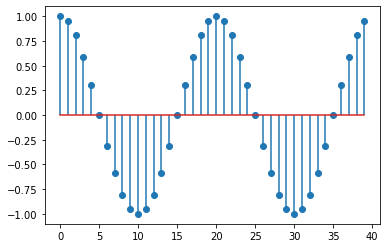

In [4]:
 n = np.arange(0, 40, 1)
 src_sig =  np.cos(2*math.pi * 2*n / 40)
 plt.stem(src_sig)

一个加上Phase shift的源信号
$$
x[n] = \cos(2 \pi \frac{2n}{40} + \frac{\pi}{3})
$$

<StemContainer object of 3 artists>

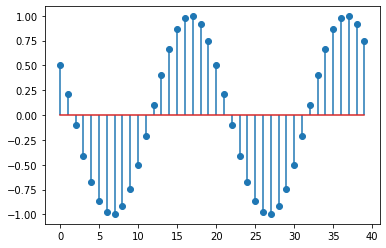

In [2]:
src_sig = np.zeros([40,40])
# 源信号 扩展了40份，每一份都是一样的
for N in range(0, 40):
    n = np.arange(0, 40, 1)
    # src_sig[N*40 : N*40 + 40] = np.cos(2*math.pi * 2*n / 40 + math.pi/3)
    src_sig[N, 0:40] = np.cos(2*math.pi * 2*n / 40 + math.pi/3)
    # src_sig[N, 0:39] = np.cos(2*math.pi * 2*n / 40 + math.pi/3)
plt.stem(src_sig[0,:])

一组sin basis，产生一组新数据。这样就有：
$$
X_{sin}[2] = {\Sigma_{n=0}^{39} \cos(2\pi \frac{2n}{40}+ \frac{\pi}{3}) \sin(2\pi \frac{2n}{40})} = 10\sqrt{3}
$$

<StemContainer object of 3 artists>

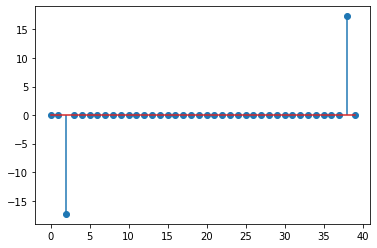

In [16]:

# 40个sin basis
sin_basis = np.zeros([40, 40])
for N in range(0, 40):
    n = np.arange(0, 40, 1)
    # sin_basis[N*40 : N*40 + 40] = np.sin(2*math.pi * N*n / 40)
    sin_basis[N, 0:40] = np.sin(2*math.pi * N*n / 40)

X_mat_sin = src_sig * sin_basis
X_sin=X_mat_sin.sum(axis=1) # 需要指定按行求和，否则默认按列求和
maxX_sin=max(X_sin)
plt.stem(X_sin)


<StemContainer object of 3 artists>

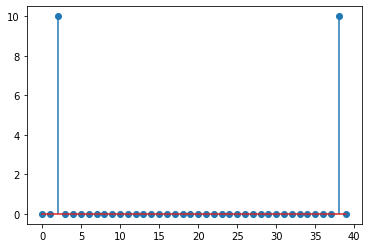

In [17]:
cos_basis = np.zeros([40, 40])
for N in range(0, 40):
    n = np.arange(0, 40, 1)
    # cos_basis[N*40 : N*40 + 40] = np.cos(2*math.pi * N*n / 40)
    cos_basis[N, 0:40] = np.cos(2*math.pi * N*n / 40)

X_mat_cos = src_sig * cos_basis
X_cos=X_mat_cos.sum(axis=1) # 需要指定按行求和，否则默认按列求和
maxX_cos=max(X_cos)
plt.stem(X_cos)



In [18]:
# 这个也就是X_cos[2] - j*X_sin[2] 
cmpl = maxX_cos - 1j * maxX_sin
mag = np.sqrt(maxX_cos**2 + maxX_sin**2)
phase = np.arctan(maxX_sin/maxX_cos)    # 也就是pi/3